In [26]:
import os
import os.path
import time
import math
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression # This dataset uses logistic regression to solve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn import svm
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
os.getcwd()

'C:\\Users\\chiuy\\Jupyter_Projects\\LA_Crime'

In [3]:
df = pd.read_csv("LA_Crime_ML_Use.csv", index_col="index")

C:\Users\chiuy\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
ML_prep = pd.DataFrame(df.groupby(by=["Time", "Age Group", "Sex", "Area Name", 
                                              "Charge Group Description", "Weekday", "Year", "Month",
                                               "Day"])["Report ID"].count().reset_index())
ML_prep.rename(columns={"Report ID": "Count"}, inplace=True)
ML_prep_dumm = pd.get_dummies(ML_prep)

In [5]:
sample = ML_prep_dumm.sample(1000, random_state=235)
X = sample.drop("Count", axis=1)
Y = sample["Count"]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
scores = cross_val_score(lin_reg, X_train, Y_train, 
                                scoring="neg_mean_squared_error",
                                cv=10)
lin_rmse_in_sample_estimates = np.sqrt(-scores)

lin_rmse_in_sample_estimates

array([0.14649565, 0.32861946, 0.35110548, 0.15846213, 0.13903296,
       0.2325434 , 0.32431107, 0.15109165, 0.17688808, 0.22014569])

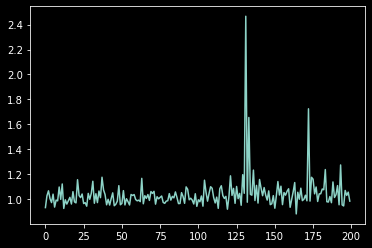

In [8]:
plt.plot(lin_reg.predict(X_test))

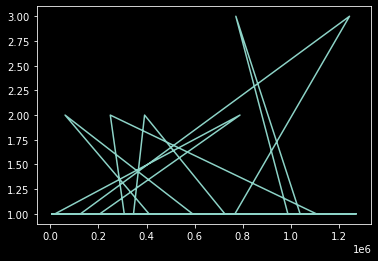

In [9]:
plt.plot(Y_test)

In [10]:
sample = ML_prep_dumm.sample(1000, random_state=20)

In [11]:
X = sample.drop("Count", axis=1)
Y = sample["Count"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [12]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, Y_train)
scores = cross_val_score(forest_reg, X_train, Y_train, 
                                scoring="neg_mean_squared_error",
                                cv=10)
forest_rmse_in_sample_estimates = np.sqrt(-scores)

forest_rmse_in_sample_estimates

array([0.19867058, 0.18945976, 0.14468932, 0.38814624, 0.17027918,
       0.26721714, 0.10853571, 0.12925749, 0.28663566, 0.27859244])

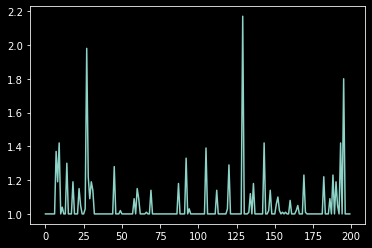

In [13]:
plt.plot(forest_reg.predict(X_test))

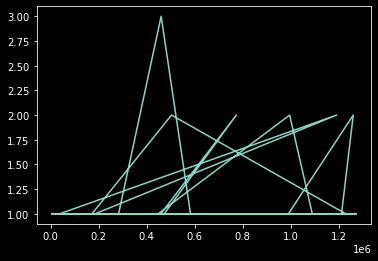

In [14]:
plt.plot(Y_test)

In [15]:
# Grouping by age makes the results too fine (mostly groups of 1 and 2), so I think the ML prediction
# becomes quite meaningless. I will try to create age brackets to solve this issue.

<AxesSubplot:ylabel='Age Group'>

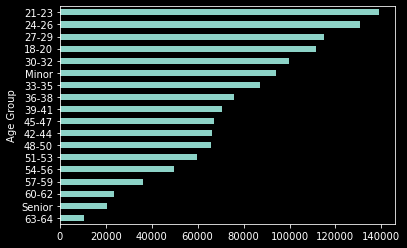

In [17]:
df.groupby("Age Group")["Report ID"].count().sort_values().plot(kind="barh")

In [19]:
df.groupby(by=["Time", "Age Group", "Sex", "Area Name", 
                                              "Charge Group Description", "Weekday", "Year", "Month",
                                               "Day"])["Report ID"].count()

Time    Age Group  Sex  Area Name    Charge Group Description        Weekday  Year  Month  Day
0.0     18-20      F    77th Street  Aggravated Assault              1        2010  1      18     1
                                                                              2016  7      18     1
                                     Miscellaneous Other Violations  6        2010  5      15     1
                                                                              2013  2      2      1
                                     Moving Traffic Violations       6        2010  9      18     1
                                                                                                 ..
2400.0  Senior     M    Van Nuys     Unknown                         3        2018  9      19     1
                        West LA      Driving Under Influence         1        2018  12     31     1
                                     Moving Traffic Violations       7        2014  12     28     1
     

In [22]:
Y_train.unique()

array([1, 2, 4, 3], dtype=int64)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
scores = cross_val_score(lin_reg, X_train, Y_train, 
                                scoring="neg_mean_squared_error",
                                cv=10)
lin_rmse_in_sample_estimates = np.sqrt(-scores)

lin_rmse_in_sample_estimates

array([0.17183337, 0.19533291, 0.12927415, 0.38151692, 0.12924512,
       0.22333702, 0.09781204, 0.08882329, 0.27647485, 0.27869639])

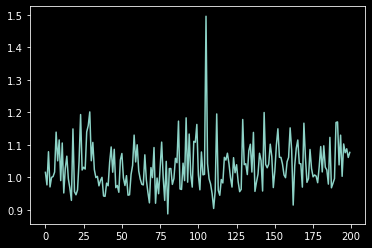

In [24]:
plt.plot(lin_reg.predict(X_test))

In [ ]:
forecaster.fit(y=data["Open"])